## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    x = x / 255
    if flatten:
        x = x.reshape((len(x), -1))
    return x
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0717 19:17:03.589753  4024 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 19:17:03.589753  4024 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 19:17:03.595751  4024 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 19:17:03.679685  4024 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 19:17:03.6

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0717 19:17:06.479948  4024 deprecation.py:323] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0717 19:17:06.540913  4024 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.9118 - acc: 0.2980 - val_loss: 1.7284 - val_acc: 0.3745
Epoch 2/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.7202 - acc: 0.3791 - val_loss: 1.6333 - val_acc: 0.4084
Epoch 3/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.6345 - acc: 0.4138 - val_loss: 1.5810 - val_acc: 0.4320
Epoch 4/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.5730 - acc: 0.4368 - val_loss: 1.5756 - val_acc: 0.4372
Epoch 5/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.5075 - acc: 0.4605 - val_loss: 1.5029 - val_acc: 0.4631
Epoch 6/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.4847 - acc: 0.4682 - val_loss: 1.4969 - val_acc: 0.4681
Epoch 7/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.4474 - acc: 0.4795 - val_loss: 1.

50000/50000 [==============================] - 8s 159us/step - loss: 0.5373 - acc: 0.8061 - val_loss: 2.0644 - val_acc: 0.5079
Epoch 60/100
50000/50000 [==============================] - 8s 170us/step - loss: 0.5360 - acc: 0.8063 - val_loss: 2.2386 - val_acc: 0.4987: 1s - loss: 0.
Epoch 61/100
50000/50000 [==============================] - 8s 165us/step - loss: 0.5338 - acc: 0.8064 - val_loss: 2.2366 - val_acc: 0.4997
Epoch 62/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.5241 - acc: 0.8099 - val_loss: 2.2347 - val_acc: 0.4967
Epoch 63/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.5074 - acc: 0.8171 - val_loss: 2.2105 - val_acc: 0.5084
Epoch 64/100
50000/50000 [==============================] - 8s 156us/step - loss: 0.4918 - acc: 0.8216 - val_loss: 2.2641 - val_acc: 0.4927
Epoch 65/100
50000/50000 [==============================] - 8s 163us/step - loss: 0.4858 - acc: 0.8233 - val_loss: 2.2230 - val_acc: 0.5050
Epoch 66/100
50000

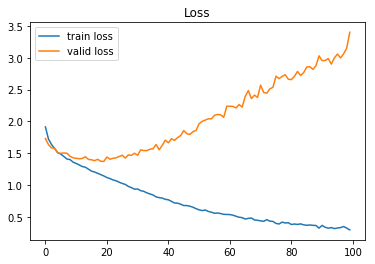

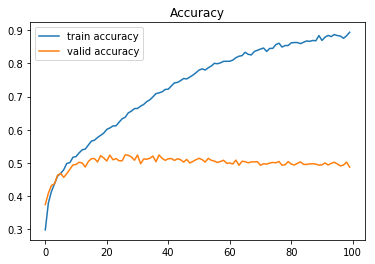

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()